## 讀取資料

In [1]:
col = ['AttributionSequenceInSession', 'EventTimestamp', 'PageInstanceID',
       'PageLocation', 'PageLocationDomain', 'PageSequenceInAttribution',
       'PageSequenceInSession', 'PageTitle', 'ReferringPageInstanceID',
       'SessionNumber', 'TopLevelWindowID', 'TrackingUuid', 'ProfileUiid']

In [2]:
import pandas
df_lists = []
for l in 'abcdefg':
    if l == 'a':
        df = pandas.read_csv('bigdatatmp/ya{}'.format(l), encoding = 'utf-8' , parse_dates=[1])
    else:
        df = pandas.read_csv('bigdatatmp/ya{}'.format(l), header=None, encoding = 'utf-8' , parse_dates=[1])
        df.columns = col
    df_lists.append(df)

In [3]:
page01 = pandas.concat(df_lists)

In [5]:
page01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6795332 entries, 0 to 804240
Data columns (total 13 columns):
AttributionSequenceInSession    int64
EventTimestamp                  datetime64[ns]
PageInstanceID                  int64
PageLocation                    object
PageLocationDomain              object
PageSequenceInAttribution       int64
PageSequenceInSession           int64
PageTitle                       object
ReferringPageInstanceID         object
SessionNumber                   int64
TopLevelWindowID                object
TrackingUuid                    object
ProfileUiid                     object
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 725.8+ MB


In [9]:
page01.to_hdf('test3.h5', 'test1', complevel = 9,complib = 'zlib' )

C:\Anaconda32\lib\site-packages\pandas\core\generic.py:1101: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['PageLocation', 'PageLocationDomain', 'PageTitle', 'ReferringPageInstanceID', 'TopLevelWindowID', 'TrackingUuid', 'ProfileUiid']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [10]:
del page01

In [11]:
page01 = pandas.read_hdf('test3.h5')

In [13]:
page01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6795332 entries, 0 to 804240
Data columns (total 13 columns):
AttributionSequenceInSession    int64
EventTimestamp                  datetime64[ns]
PageInstanceID                  int64
PageLocation                    object
PageLocationDomain              object
PageSequenceInAttribution       int64
PageSequenceInSession           int64
PageTitle                       object
ReferringPageInstanceID         object
SessionNumber                   int64
TopLevelWindowID                object
TrackingUuid                    object
ProfileUiid                     object
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 725.8+ MB


In [16]:
page01.head()

,AttributionSequenceInSession,EventTimestamp,PageInstanceID,PageLocation,PageLocationDomain,PageSequenceInAttribution,PageSequenceInSession,PageTitle,ReferringPageInstanceID,SessionNumber,TopLevelWindowID,TrackingUuid,ProfileUiid
0,1,2016-07-20 16:11:23.384,200292034,https://www.mybank.com.tw/mybank/home/MyMobiBank,https://www.mybank.com.tw,1,1,@MyBank - H,Null,20029488,_14690022832350.8330724521074444_,e91778f6-dd1a-469a-ae6e-8778e71c3460,Null
1,1,2016-07-20 20:12:59.788,201053626,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,https://www.mybank.com.tw,2,2,@MyBank - H,Null,20105815,_14690167588220.0396215803685962_,a9fdf990-bd01-4370-87ec-72f1cf0b257f,Null
2,1,2016-07-20 11:31:30.485,198801327,https://www.mybank.com.tw/MyBank/Quicklinks/Home,https://www.mybank.com.tw,1,1,@MyBank - H,Null,19880321,_14689854656640.46536951102007046_,4170b9b6-6cd0-4452-a40f-0469fdbf4489,Null
3,1,2016-07-20 12:45:29.674,199200852,app://com.cathaybk.mymobibank.android.app,app://com.cathaybk.mymobibank.android.app,1,1,@,Null,19920228,Null,2ca95944-8442-49cd-b37b-e18d460e003a,Null
4,1,2016-07-20 17:34:26.700,200603410,app://com.cathaybk.mmb.ios.app/@,app://com.cathaybk.mmb.ios.app,2,2,@,Null,20060810,Null,86e51bd4-3893-4b24-9a36-79172908be34,Null


In [19]:
page01.PageLocation.head(3)

0     https://www.mybank.com.tw/mybank/home/MyMobiBank
1    https://www.mybank.com.tw/MyBank/Quicklinks/Ho...
2     https://www.mybank.com.tw/MyBank/Quicklinks/Home
Name: PageLocation, dtype: object

In [21]:
page01['PageLocation'].head(3)

0     https://www.mybank.com.tw/mybank/home/MyMobiBank
1    https://www.mybank.com.tw/MyBank/Quicklinks/Ho...
2     https://www.mybank.com.tw/MyBank/Quicklinks/Home
Name: PageLocation, dtype: object

In [23]:
page01.PageLocation.str.contains('app:').head()

0    False
1    False
2    False
3     True
4     True
Name: PageLocation, dtype: bool

In [24]:
web01 = page01[~page01.PageLocation.str.contains('app:')]
web01.to_hdf('w1.h5', 'w1')

C:\Anaconda32\lib\site-packages\pandas\core\generic.py:1101: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['PageLocation', 'PageLocationDomain', 'PageTitle', 'ReferringPageInstanceID', 'TopLevelWindowID', 'TrackingUuid', 'ProfileUiid']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


## 資料探索

In [26]:
web01.head()

,AttributionSequenceInSession,EventTimestamp,PageInstanceID,PageLocation,PageLocationDomain,PageSequenceInAttribution,PageSequenceInSession,PageTitle,ReferringPageInstanceID,SessionNumber,TopLevelWindowID,TrackingUuid,ProfileUiid
0,1,2016-07-20 16:11:23.384,200292034,https://www.mybank.com.tw/mybank/home/MyMobiBank,https://www.mybank.com.tw,1,1,@MyBank - H,Null,20029488,_14690022832350.8330724521074444_,e91778f6-dd1a-469a-ae6e-8778e71c3460,Null
1,1,2016-07-20 20:12:59.788,201053626,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,https://www.mybank.com.tw,2,2,@MyBank - H,Null,20105815,_14690167588220.0396215803685962_,a9fdf990-bd01-4370-87ec-72f1cf0b257f,Null
2,1,2016-07-20 11:31:30.485,198801327,https://www.mybank.com.tw/MyBank/Quicklinks/Home,https://www.mybank.com.tw,1,1,@MyBank - H,Null,19880321,_14689854656640.46536951102007046_,4170b9b6-6cd0-4452-a40f-0469fdbf4489,Null
5,1,2016-07-20 12:17:57.815,199060283,https://www.cathaybk.com.tw/cathaybk/personal_...,https://www.cathaybk.com.tw,1,1,w{@-HA-Yv,Null,19906076,_14689882765560.7659958160835434_,2ca95944-8442-49cd-b37b-e18d460e003a,Null
6,1,2016-07-20 09:49:22.541,198152696,https://www.mybank.com.tw/MyBank/Quicklinks/Ho...,https://www.mybank.com.tw,1,1,@MyBank - H,Null,19815597,_14689757969690.06123872986063361_,9984fbef-6750-4e57-87c7-656f0b361d65,Null


In [28]:
web01.EventTimestamp.head()

0   2016-07-20 16:11:23.384
1   2016-07-20 20:12:59.788
2   2016-07-20 11:31:30.485
5   2016-07-20 12:17:57.815
6   2016-07-20 09:49:22.541
Name: EventTimestamp, dtype: datetime64[ns]

In [30]:
web01.EventTimestamp.dt.date.head()

0    2016-07-20
1    2016-07-20
2    2016-07-20
5    2016-07-20
6    2016-07-20
Name: EventTimestamp, dtype: object

In [31]:
web01.EventTimestamp.dt.date.value_counts()

2016-07-25    951282
2016-07-20    883184
2016-07-21    874897
2016-07-22    834354
2016-07-23    337603
2016-07-24    328683
Name: EventTimestamp, dtype: int64

In [37]:
web01.EventTimestamp.dt.date.count()

4210003

In [32]:
web_view_by_date = web01.EventTimestamp.dt.date.value_counts()

In [33]:
type(web_view_by_date)

pandas.core.series.Series

In [35]:
empty_series = pandas.Series()
print(empty_series)
empty_series= empty_series.append(web_view_by_date)
print(empty_series)

Series([], dtype: float64)
2016-07-25    951282
2016-07-20    883184
2016-07-21    874897
2016-07-22    834354
2016-07-23    337603
2016-07-24    328683
dtype: int64


## 讀取page01 ~ 07 的資料

In [36]:
import pandas
date_series = pandas.Series([])
for p in range(1,8):
    web = pandas.read_hdf('web0{}.h5'.format(p))
    web_view_date = web.EventTimestamp.dt.date.value_counts()
    date_series = date_series.append(web_view_date)


In [39]:
date_series.sort_index()

2016-07-20     883184
2016-07-21     874897
2016-07-22     834354
2016-07-23     337603
2016-07-24     328683
2016-07-25     951282
2016-07-26     898462
2016-07-27     877343
2016-07-28     913577
2016-07-29    1210027
2016-07-30     395106
2016-07-31     382709
2016-08-01    1456365
2016-08-02    1250164
2016-08-03    1146646
2016-08-04    1125910
2016-08-05    1612407
2016-08-06     450696
2016-08-07     373144
2016-08-08    1196956
2016-08-09    1146753
2016-08-10    1124049
2016-08-11    1161011
2016-08-12    1081757
2016-08-13     146594
2016-08-14     375267
2016-08-15    1234007
2016-08-16    1171552
2016-08-17    1103967
2016-08-18    1080477
2016-08-19    1069106
2016-08-20     406383
dtype: int64

In [41]:
%pylab inline
?date_series.plot
#date_series.sort_index().plot(kind='line')

Populating the interactive namespace from numpy and matplotlib


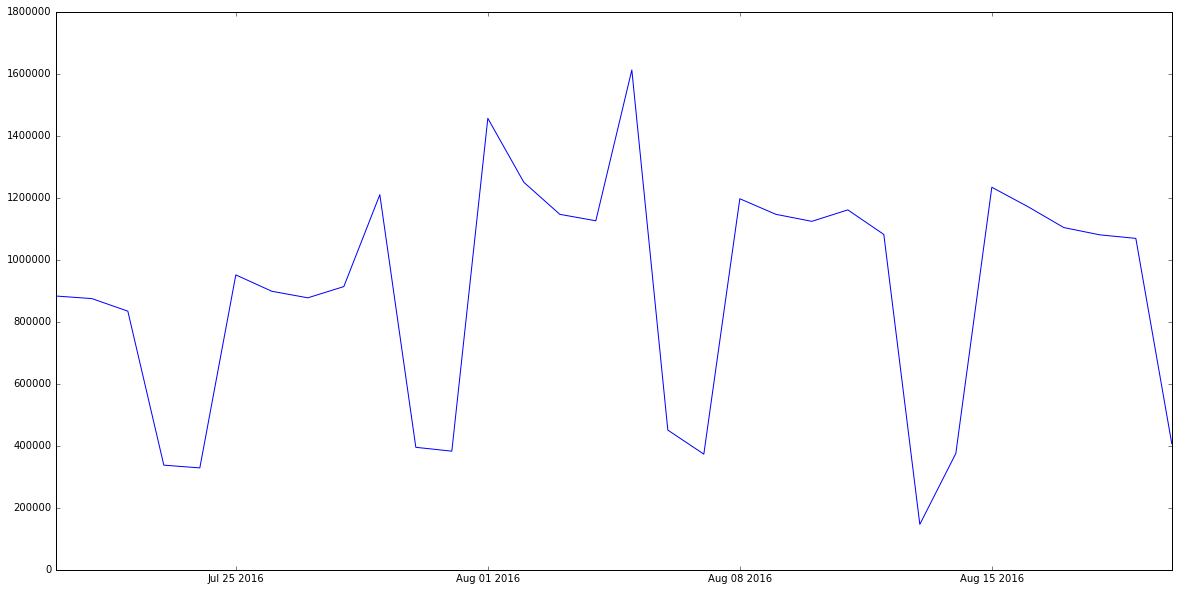

In [42]:
date_series.sort_index().plot(kind='line', figsize=[20, 10])

In [46]:
date_series.index =pandas.to_datetime(date_series.index)

In [51]:
from24to31 = date_series[(date_series.index >= '2016-07-24') & (date_series.index < '2016-07-31') ]

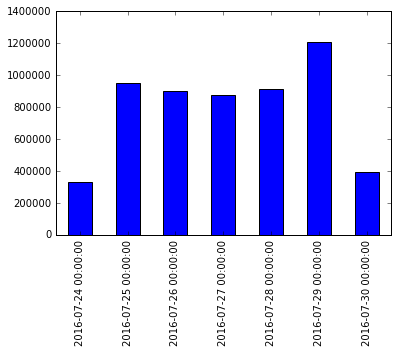

In [54]:
from24to31.sort_index().plot(kind='bar')

## 月末時候使用者都在看什麼

In [61]:
del web

In [56]:
import pandas
pageview0720_0730 = pandas.read_hdf('pageview0720_0730.h5')

In [62]:
pageview0720_0730.EventTimestamp.dt.date.value_counts()

2016-07-29    1210027
2016-07-25     951282
2016-07-28     913577
2016-07-26     898462
2016-07-20     883184
2016-07-27     877343
2016-07-21     874897
2016-07-22     834354
2016-07-30     395106
2016-07-31     382709
2016-07-23     337603
2016-07-24     328683
Name: EventTimestamp, dtype: int64

In [70]:
pagecnt0722= pageview0720_0730[(pageview0720_0730.EventTimestamp >= '2016-07-22') &
                 (pageview0720_0730.EventTimestamp < '2016-07-23')]['PageLocation'].value_counts()

In [72]:
pagecnt0722[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    115914
https://www.mybank.com.tw/mybank                                     69945
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout              47824
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             36816
https://www.cathaybk.com.tw/cathaybk/                                35319
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank          31110
https://www.mybank.com.tw/mybank/home/MyMobiBank                     28562
https://www.mybank.com.tw/MyBank/Home/Login                          21698
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     17905
https://www.mybank.com.tw/mybank/Home/MyMobiBank                     15084
Name: PageLocation, dtype: int64

In [73]:
pagecnt0729= pageview0720_0730[(pageview0720_0730.EventTimestamp >= '2016-07-29') &
                 (pageview0720_0730.EventTimestamp < '2016-07-30')]['PageLocation'].value_counts()

In [74]:
pagecnt0729[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    173547
https://www.mybank.com.tw/mybank                                     99065
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout              72819
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             67174
https://www.cathaybk.com.tw/cathaybk/                                45161
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank          44202
https://www.mybank.com.tw/mybank/home/MyMobiBank                     38303
https://www.mybank.com.tw/MyBank/Home/Login                          33719
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     25942
https://www.myb2b.com.tw/ebank/default.asp                           22225
Name: PageLocation, dtype: int64

In [86]:
merged_df = pandas.concat([pagecnt0722, pagecnt0729], axis=1)

In [91]:
merged_df.columns= [ '0722', '0729']

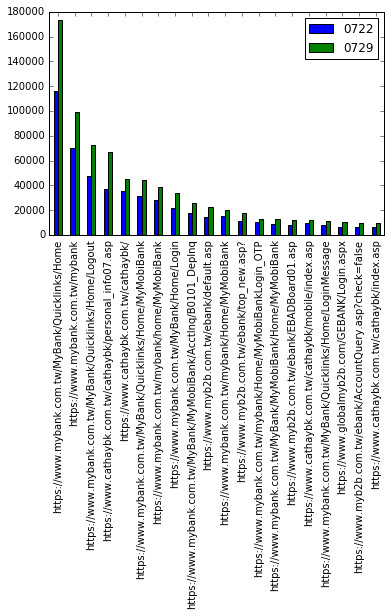

In [99]:
merged_df.sort_values('0729', ascending=False).head(20).plot(kind='bar')

In [100]:
pagecnt0724= pageview0720_0730[(pageview0720_0730.EventTimestamp >= '2016-07-24') &
                 (pageview0720_0730.EventTimestamp < '2016-07-25')]['PageLocation'].value_counts()

In [102]:
pagecnt0724[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    41680
https://www.mybank.com.tw/mybank                                    26118
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout             17836
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank         17421
https://www.mybank.com.tw/mybank/home/MyMobiBank                    16075
https://www.cathaybk.com.tw/cathaybk/                               11249
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     9630
https://www.mybank.com.tw/MyBank/Home/Login                          8931
https://www.mybank.com.tw/mybank/Home/MyMobiBank                     8663
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             6201
Name: PageLocation, dtype: int64

In [106]:
pagecnt0722[0:10]

https://www.mybank.com.tw/MyBank/Quicklinks/Home                    115914
https://www.mybank.com.tw/mybank                                     69945
https://www.mybank.com.tw/MyBank/Quicklinks/Home/Logout              47824
https://www.cathaybk.com.tw/cathaybk/personal_info07.asp             36816
https://www.cathaybk.com.tw/cathaybk/                                35319
https://www.mybank.com.tw/MyBank/Quicklinks/Home/MyMobiBank          31110
https://www.mybank.com.tw/mybank/home/MyMobiBank                     28562
https://www.mybank.com.tw/MyBank/Home/Login                          21698
https://www.mybank.com.tw/MyBank/MyMobiBank/AcctInq/B0101_DepInq     17905
https://www.mybank.com.tw/mybank/Home/MyMobiBank                     15084
Name: PageLocation, dtype: int64

In [107]:
merged_df2 = pandas.concat([pagecnt0722, pagecnt0724], axis=1)

In [108]:
merged_df2.columns= [ '0722', '0724']

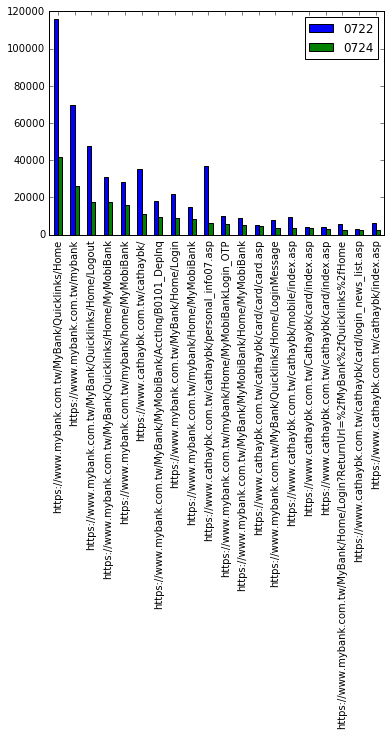

In [109]:
merged_df2.sort_values('0724', ascending=False).head(20).plot(kind='bar')

## 讀取Visitor 的資訊

In [110]:
import pandas
visitor = pandas.read_hdf('visitor.h5')
visitor.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3232176 entries, 0 to 3232175
Data columns (total 4 columns):
CookieUniqueVisitorTrackingId    object
EventTimestamp                   datetime64[ns]
SessionNumber                    int64
TrackingUuid                     object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 123.3+ MB


In [112]:
visitor.head()

,CookieUniqueVisitorTrackingId,EventTimestamp,SessionNumber,TrackingUuid
0,9c35ec76214740e9bd5cdc660d534d2f,2016-07-20 16:11:43.150,20029488,dddd32a4-3682-471a-a163-4c7bf62f3071
1,25811d71ea5f4edd9a784e1617a5a691,2016-07-20 20:13:13.161,20105815,53112d09-3db9-4106-b473-21242767df23
2,a3d2ca8ab6d94ca1adb9bd51a6e7d42f,2016-07-20 11:31:30.485,19880321,1db3e23d-2b8f-48c7-8551-5615ffd80ad1
3,7693b6b203f240599d71d31fd202f329,2016-07-20 12:45:29.674,19920228,a0d8cb8b-2022-4998-864f-2fab866b6b2a
4,c1f31e426e594b7ab2c8daf2b2c001c4,2016-07-20 17:34:25.508,20060810,b80043ad-53a0-4936-99d0-49443ef9cb4e


In [113]:
visitor['EventDate'] = visitor['EventTimestamp'].dt.date

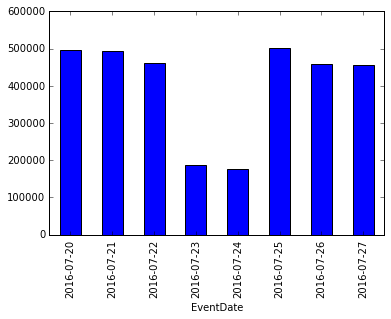

In [116]:
# select count(cookieuniquevisitortrackingid), eventdate from visior
# group by eventdate
visitor_cnt = visitor.groupby('EventDate')['CookieUniqueVisitorTrackingId'].count()
visitor_cnt.plot(kind= 'bar')

In [117]:
# select cookieuniquevisitortrackingid, eventdate, count(session) from visitor
# group by cookieuniquevisitortrackingid, eventdate
visitor_on_site = visitor.groupby(['EventDate','CookieUniqueVisitorTrackingId'])['SessionNumber'].count()


In [119]:
import pandas
pandas.to_datetime(visitor_on_site.index.get_level_values('EventDate')) == '2016-07-20' 

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [136]:
visitor_on_0720  = visitor_on_site[pandas.to_datetime(visitor_on_site.index.get_level_values('EventDate')) == '2016-07-20' ]

In [122]:
visitor_on_0720.head()

EventDate   CookieUniqueVisitorTrackingId   
2016-07-20  000030264ec54bb997703e9e05d25c4d    4
            00003862177641d08c8fa11eb807feb0    2
            000044d10f0a41a68ad6c91bc2afae22    2
            000048e29626421ea25e0497a09b2d74    1
            0000ae4014c24ad58287bf3481f1fef1    1
Name: SessionNumber, dtype: int64

In [124]:
visitor_on_0720.describe()

count    262361.000000
mean          1.886969
std           1.937555
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max         656.000000
Name: SessionNumber, dtype: float64

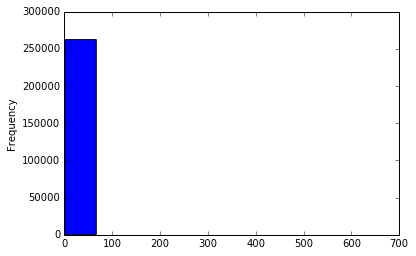

In [125]:
visitor_on_0720.plot(kind='hist')

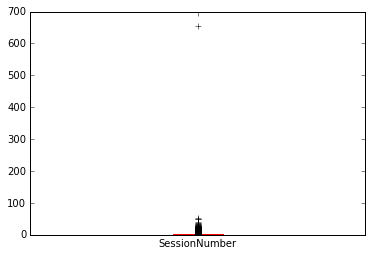

In [137]:
visitor_on_0720.plot(kind='box')

In [128]:
visitor_on_0720.sort_values(ascending=False).head()

EventDate   CookieUniqueVisitorTrackingId   
2016-07-20  ?                                   656
            36686bfc2aac4d72b231efe6a92c2098     54
            7d20af43a7e841b6a7ba74f9663c081d     50
            6b6b6fec868d4a2aa1c71998dd258472     50
            8c0400581a214af6b2638d9138ad8e04     41
Name: SessionNumber, dtype: int64

In [138]:
visitor_on_0720 = visitor_on_0720[visitor_on_0720 < 100]

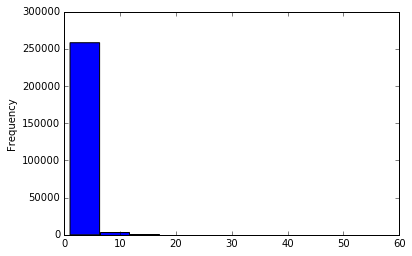

In [134]:
visitor_on_0720.plot(kind='hist')

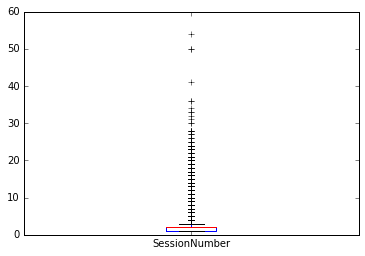

In [139]:
visitor_on_0720.plot(kind='box')

In [135]:
visitor_on_0720.describe()

count    262360.000000
mean          1.884476
std           1.457153
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          54.000000
Name: SessionNumber, dtype: float64